In [77]:
pip install sktime

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
data=pd.read_csv("example_air_passengers.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

In [80]:
data.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Ploting the data before transformation

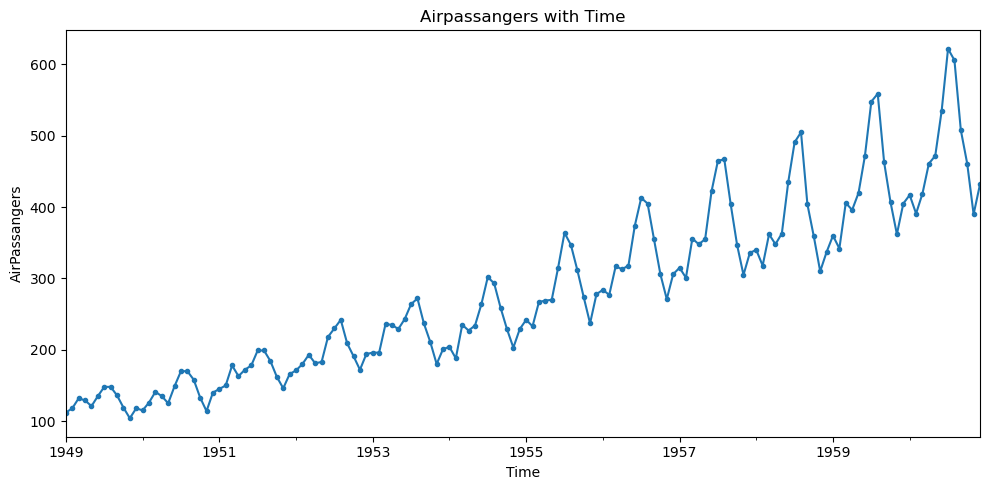

In [81]:
fig,ax=plt.subplots(figsize=[10,5])
data.plot(y='y',marker='.',figsize=[10,5],legend=None,ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('AirPassangers')
ax.set_title('Airpassangers with Time')
plt.tight_layout()

# Applying Box Cox transformation using scipy

In [82]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [83]:
df=data.copy()

In [84]:
df['Y_boxcox']=boxcox(df["y"],lmbda=0) # if lambda is equal to zero then it is equal to log transformation


In [85]:
df.head(2)

,y,Y_boxcox
ds,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685


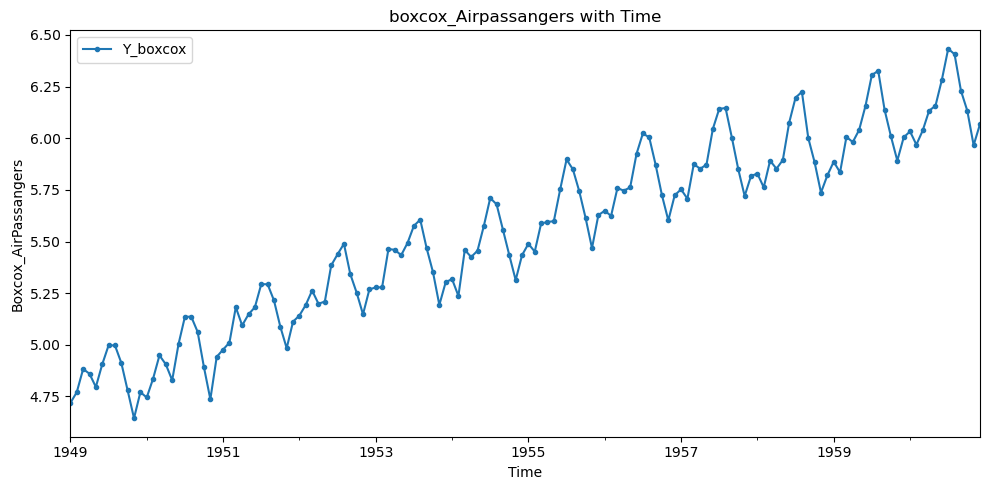

In [86]:
fig,ax=plt.subplots(figsize=[10,5])
df.plot(y='Y_boxcox',marker='.',figsize=[10,5],legend="$\lambda=0$",ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Boxcox_AirPassangers')
ax.set_title('boxcox_Airpassangers with Time')
plt.tight_layout()

We can let scipy find the value of lambda automatically by putting lambda =None 

In [87]:
df['Y_boxcox'],lmbda=boxcox(df['y'],lmbda=None)
print(f"the value of lambda is{lmbda:.3f}")

the value of lambda is0.148


In [88]:
df.head()

,y,Y_boxcox
ds,,
1949-01-01,112,6.827490
1949-02-01,118,6.932822
1949-03-01,132,7.161892
1949-04-01,129,7.114611
1949-05-01,121,6.983787


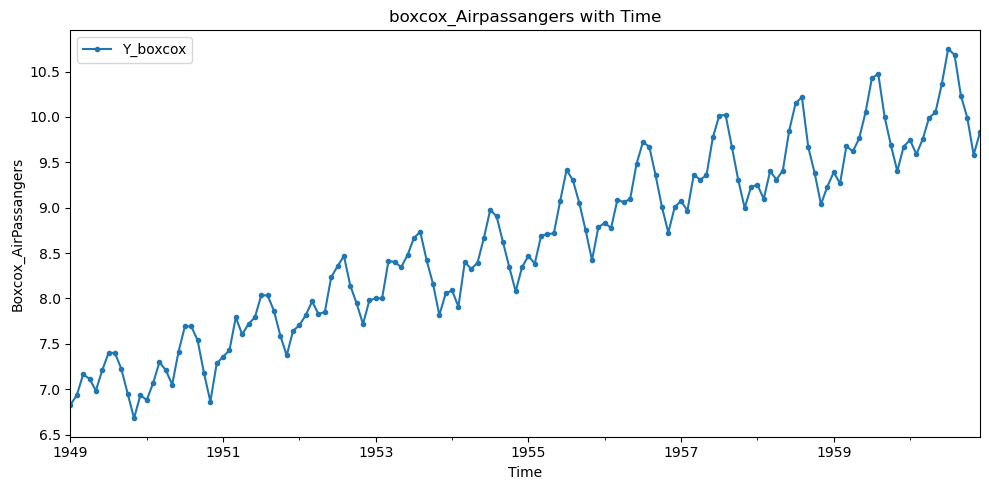

In [89]:
fig,ax=plt.subplots(figsize=[10,5])
df.plot(y='Y_boxcox',marker='.',figsize=[10,5],legend="$\lambda={lmbda:.3f}$",ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Boxcox_AirPassangers')
ax.set_title('boxcox_Airpassangers with Time')
plt.tight_layout()

# Log transform with sktime

In [90]:
from sktime.transformations.series.boxcox import LogTransformer

In [91]:
df=data.copy()

In [92]:
transformer=LogTransformer()
df["Y_log"]=transformer.fit_transform(df["y"])

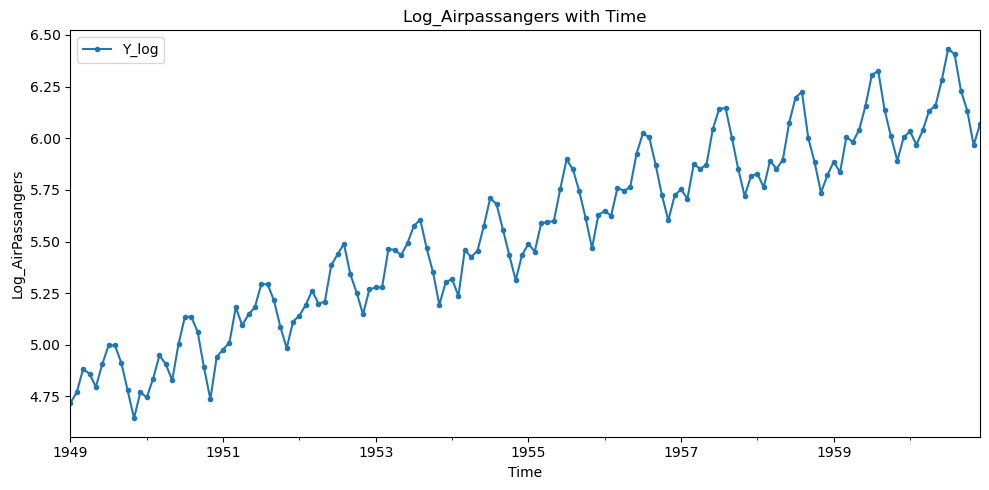

In [93]:
fig,ax=plt.subplots(figsize=[10,5])
df.plot(y='Y_log',marker='.',figsize=[10,5],ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Log_AirPassangers')
ax.set_title('Log_Airpassangers with Time')
plt.tight_layout()

In [94]:
df['Y_orginal']=transformer.inverse_transform(df['Y_log'])

In [95]:
df.head()

,y,Y_log,Y_orginal
ds,,,
1949-01-01,112,4.718499,112.0
1949-02-01,118,4.770685,118.0
1949-03-01,132,4.882802,132.0
1949-04-01,129,4.859812,129.0
1949-05-01,121,4.795791,121.0


# BoxCox with sktime

In [96]:
from sktime.transformations.series.boxcox import BoxCoxTransformer

In [97]:
df=data.copy()

In [98]:
transformer=BoxCoxTransformer(
    method="guerrero",
    sp=12 # sp should be set to the sesonal period
)
df['guerrero']=transformer.fit_transform(df["y"])

In [99]:
transformer.lambda_

-0.2947236481659704

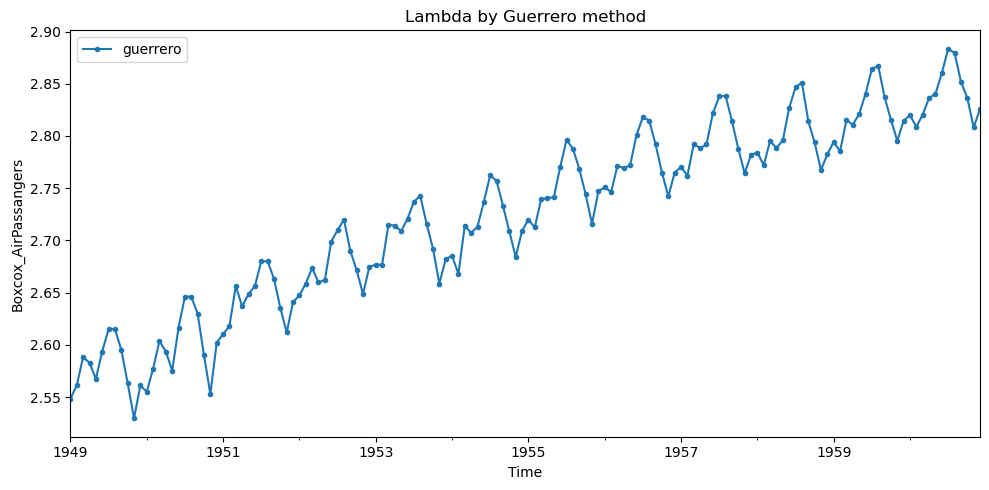

In [100]:
fig,ax=plt.subplots(figsize=[10,5])
df.plot(y='guerrero',marker='.',figsize=[10,5],legend="$\lambda={transformer.lmbda_:.3f}$",ax=ax)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Boxcox_AirPassangers')
ax.set_title('Lambda by Guerrero method')
plt.tight_layout()

log and Boxcox with feature engine

In [101]:
from feature_engine.transformation import BoxCoxTransformer, LogTransformer

In [103]:
df = data.copy()
# Add a new column to show Box Cox transformer handling two columns
df["X"] = df["y"] * 6

In [104]:
transformer = BoxCoxTransformer(variables=["y", "X"])
df[["Y_boxcox", "X_boxcox"]] = transformer.fit_transform(df)
df.head()

,y,X,Y_boxcox,X_boxcox
ds,,,,
1949-01-01,112,672,6.827490,10.952969
1949-02-01,118,708,6.932822,11.090293
1949-03-01,132,792,7.161892,11.388934
1949-04-01,129,774,7.114611,11.327294
1949-05-01,121,726,6.983787,11.156736


In [105]:
transformer.lambda_dict_

{'y': 0.14802265137037945, 'X': 0.1480226147369607}